# 4. (Generador Pseudoaleatorio Uniforme)

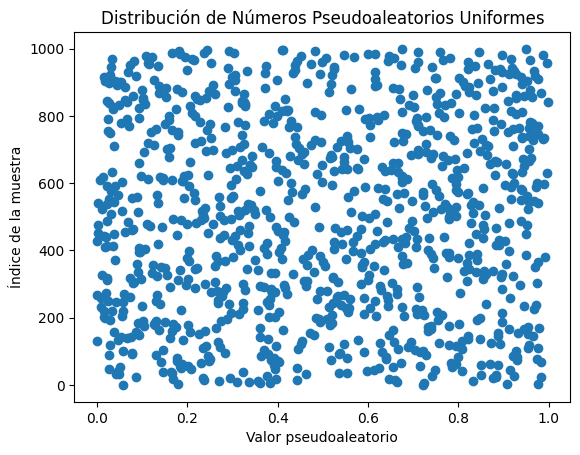

Estadístico de Kolmogorov-Smirnov: 0.02189383668825029
p-valor: 0.7153418535248242
No se rechaza la hipótesis nula: la secuencia sigue una distribución uniforme.


In [ ]:
from typing import Iterator
from matplotlib import pyplot as plt
from scipy.stats import kstest

def generador_lineal_congruencial(modulo: int, multiplicador: int, incremento: int, semilla: int) -> Iterator[int]:
    """
    Implementación del Generador Lineal Congruencial (GLC).
    :param modulo: el valor del módulo, una constante positiva
    :param multiplicador: el factor de multiplicación, menor que el módulo
    :param incremento: el valor de incremento, menor que el módulo
    :param semilla: el valor inicial para comenzar la generación
    :return: un número entero en el rango [0, modulo - 1], que representa el estado actual del generador
    """
    x = semilla
    while True:
        yield x
        x = (multiplicador * x + incremento) % modulo


def muestra_aleatoria_uniforme(n_muestras: int, semilla: int = 123_456_789) -> list[float]:
    """
    Genera una lista de números pseudoaleatorios con distribución uniforme en [0, 1).
    :param n_muestras: cantidad de números a generar
    :param semilla: valor inicial para el GLC
    :return: lista de longitud n_muestras con los números generados
    """
    MODULO = 2_147_483_648
    MULTIPLICADOR = 594_156_893
    INCREMENTO = 0

    generador = generador_lineal_congruencial(MODULO, MULTIPLICADOR, INCREMENTO, semilla)
    secuencia = []

    for _ in range(n_muestras):
        numero_aleatorio = next(generador) / MODULO
        secuencia.append(numero_aleatorio)

    return secuencia


# Generamos una lista de números pseudoaleatorios
N = 1000  # Cantidad de muestras a generar
secuencia_aleatoria = muestra_aleatoria_uniforme(N)

# Visualización de la secuencia generada
plt.scatter(secuencia_aleatoria, range(N))
plt.title("Distribución de Números Pseudoaleatorios Uniformes")
plt.xlabel("Valor pseudoaleatorio")
plt.ylabel("Índice de la muestra")
plt.show()


# Prueba de Kolmogorov-Smirnov para evaluar la distribución
estadistico, p_valor = kstest(secuencia_aleatoria, 'uniform')
print(f"Estadístico de Kolmogorov-Smirnov: {estadistico}")
print(f"p-valor: {p_valor}")

if p_valor > 0.05:
    print("No se rechaza la hipótesis nula: la secuencia sigue una distribución uniforme.")
else:
    print("Se rechaza la hipótesis nula: la secuencia no sigue una distribución uniforme.")


El experimento muestra que, con los parámetros adecuados, el Generador Lineal Congruencial puede producir una secuencia de números pseudoaleatorios que sigue de manera adecuada una distribución uniforme. Sin embargo, la calidad del GLC depende de los parámetros seleccionados, por lo que es importante elegirlos cuidadosamente para evitar patrones repetitivos o sesgos en la secuencia generada.